In [1]:
#coding: utf-8
import cv2
import cv2.cv as cv
import os
import numpy as np
import time
try:
    from ConfigParser import ConfigParser
except ImportError:
    from ConfigParser import ConfigParser  # ver. < 3.0

## Bibliotecas de apoio para o iPython

In [2]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

%matplotlib inline

### Dicionários de apoio

In [3]:
## Dicionário para segmentação do branco
seg_white = {
    'H_min': [0, # Valor usado
                'int', # Tipo do dado
                0, # Valor mínimo atingido
                255, # Valor máximo  atingido
                "Valor do hue mínimo usado para a segmentação do branco" # Comentário do config.ini
             ],
    'S_min': [0, # Valor usado
                'int', # Tipo do dado
                0, # Valor mínimo atingido
                255, # Valor máximo  atingido
                "Valor do saturation mínimo usado para a segmentação do branco" # Comentário do config.ini
             ],
    'V_min': [0, # Valor usado
                'int', # Tipo do dado
                0, # Valor mínimo atingido
                255, # Valor máximo  atingido
                "Valor do value mínimo usado para a segmentação do branco" # Comentário do config.ini
             ],
    'H_max': [255, # Valor usado
                'int', # Tipo do dado
                0, # Valor mínimo atingido
                255, # Valor máximo  atingido
                "Valor do hue máximo usado para a segmentação do branco" # Comentário do config.ini
             ],
    'S_max': [255, # Valor usado
                'int', # Tipo do dado
                0, # Valor mínimo atingido
                255, # Valor máximo  atingido
                "Valor do saturation máximo usado para a segmentação do branco" # Comentário do config.ini
             ],
    'V_max': [255, # Valor usado
                'int', # Tipo do dado
                0, # Valor mínimo atingido
                255, # Valor máximo  atingido
                "Valor do value máximo usado para a segmentação do branco" # Comentário do config.ini
             ],
    'size_element': [2, # Valor usado
                'int', # Tipo do dado
                1, # Valor mínimo atingido
                255, # Valor máximo  atingido
                "Tamaho do elemento estruturante usado na erosão e na dilatação" # Comentário do config.ini
             ],
    'iterations': [2, # Valor usado
                'int', # Tipo do dado
                1, # Valor mínimo atingido
                50, # Valor máximo  atingido
                "Número de interações que serão aplicadas na erosão e na dilatação" # Comentário do config.ini
             ],
    'blur': [0, # Valor usado
                'int', # Tipo do dado
                0, # Valor mínimo atingido
                10, # Valor máximo  atingido
                "Tamaho do elemento estruturante usado no medianBlur" # Comentário do config.ini
             ],
    'comment': 'Valores usados para a segmentação do branco',
    'section': 'Seg. Branco'
}

## Dicionário para segmentação do verde
seg_green = {
    'H_min': [0, # Valor usado
                'int', # Tipo do dado
                0, # Valor mínimo atingido
                255, # Valor máximo  atingido
                "Valor do hue mínimo usado para a segmentação do verde" # Comentário do config.ini
             ],
    'S_min': [0, # Valor usado
                'int', # Tipo do dado
                0, # Valor mínimo atingido
                255, # Valor máximo  atingido
                "Valor do saturation mínimo usado para a segmentação do verde" # Comentário do config.ini
             ],
    'V_min': [0, # Valor usado
                'int', # Tipo do dado
                0, # Valor mínimo atingido
                255, # Valor máximo  atingido
                "Valor do value mínimo usado para a segmentação do verde" # Comentário do config.ini
             ],
    'H_max': [255, # Valor usado
                'int', # Tipo do dado
                0, # Valor mínimo atingido
                255, # Valor máximo  atingido
                "Valor do hue máximo usado para a segmentação do verde" # Comentário do config.ini
             ],
    'S_max': [255, # Valor usado
                'int', # Tipo do dado
                0, # Valor mínimo atingido
                255, # Valor máximo  atingido
                "Valor do saturation máximo usado para a segmentação do verde" # Comentário do config.ini
             ],
    'V_max': [255, # Valor usado
                'int', # Tipo do dado
                0, # Valor mínimo atingido
                255, # Valor máximo  atingido
                "Valor do value máximo usado para a segmentação do verde" # Comentário do config.ini
             ],
    'size_element': [2, # Valor usado
                'int', # Tipo do dado
                1, # Valor mínimo atingido
                255, # Valor máximo  atingido
                "Tamaho do elemento estruturante usado na erosão e na dilatação" # Comentário do config.ini
             ],
    'iterations': [2, # Valor usado
                'int', # Tipo do dado
                1, # Valor mínimo atingido
                50, # Valor máximo  atingido
                "Número de interações que serão aplicadas na erosão e na dilatação" # Comentário do config.ini
             ],
    'blur': [0, # Valor usado
                'int', # Tipo do dado
                0, # Valor mínimo atingido
                10, # Valor máximo  atingido
                "Tamaho do elemento estruturante usado no medianBlur" # Comentário do config.ini
             ],
    'comment': 'Valores usados para a segmentação do verde',
    'section': 'Seg. Verde'
}

## Dicionário para reconstrução interna da máscara
internal_reconstruction = {
    'size_element': [2, # Valor usado
                'int', # Tipo do dado
                1, # Valor mínimo atingido
                255, # Valor máximo  atingido
                "Tamaho do elemento estruturante usado na erosão e na dilatação" # Comentário do config.ini
             ],
    'iterations': [2, # Valor usado
                'int', # Tipo do dado
                1, # Valor mínimo atingido
                50, # Valor máximo  atingido
                "Número de interações que serão aplicadas na erosão e na dilatação" # Comentário do config.ini
             ],
    'comment': 'Valores usados para reconstruir uma máscara',
    'section': 'Reconstrução interna'
}

## Dicionário para dilatação da máscara
mask_dilate = {
    'size_element': [2, # Valor usado
                'int', # Tipo do dado
                1, # Valor mínimo atingido
                255, # Valor máximo  atingido
                "Tamaho do elemento estruturante usado na erosão e na dilatação" # Comentário do config.ini
             ],
    'iterations': [2, # Valor usado
                'int', # Tipo do dado
                1, # Valor mínimo atingido
                50, # Valor máximo  atingido
                "Número de interações que serão aplicadas na erosão e na dilatação" # Comentário do config.ini
             ],
    'diff': [1, # Valor usado
                'int', # Tipo do dado
                1, # Valor mínimo atingido
                50, # Valor máximo  atingido
                "Diferença entre a erosão e a dilatação" # Comentário do config.ini
             ],
    'blur': [0, # Valor usado
                'int', # Tipo do dado
                0, # Valor mínimo atingido
                10, # Valor máximo  atingido
                "Tamaho do elemento estruturante usado no medianBlur (Valor obrigatoriamente ímpar ou zero)" # Comentário do config.ini
             ],
    'comment': 'Valores usados para dilatação da máscara',
    'section': 'Dilatação Máscara'
}

## Dicionário para parametros do Circulo de Hough
paramcirhough = {
    'dp': [1, # Valor usado
                'float', # Tipo do dado
                1, # Valor mínimo atingido
                255, # Valor máximo  atingido
                "Inverse ratio of the accumulator resolution to the image resolution. For example, if dp=1 , the accumulator has the same resolution as the input image. If dp=2 , the accumulator has half as big width and height." # Comentário do config.ini
             ],
    'minDist': [20, # Valor usado
                'int', # Tipo do dado
                1, # Valor mínimo atingido
                50, # Valor máximo  atingido
                "Minimum distance between the centers of the detected circles. If the parameter is too small, multiple neighbor circles may be falsely detected in addition to a true one. If it is too large, some circles may be missed." # Comentário do config.ini
             ],
    'param1': [50, # Valor usado
                'int', # Tipo do dado
                1, # Valor mínimo atingido
                50, # Valor máximo  atingido
                "First method-specific parameter. In case of CV_HOUGH_GRADIENT , it is the higher threshold of the two passed to the Canny() edge detector (the lower one is twice smaller)." # Comentário do config.ini
             ],
    'param2': [30, # Valor usado
                'int', # Tipo do dado
                1, # Valor mínimo atingido
                50, # Valor máximo  atingido
                "Second method-specific parameter. In case of CV_HOUGH_GRADIENT , it is the accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected. Circles, corresponding to the larger accumulator values, will be returned first." # Comentário do config.ini
             ],
    'minRadius': [0, # Valor usado
                'int', # Tipo do dado
                1, # Valor mínimo atingido
                50, # Valor máximo  atingido
                "Minimum circle radius." # Comentário do config.ini
             ],
    'maxRadius': [0, # Valor usado
                'int', # Tipo do dado
                1, # Valor mínimo atingido
                50, # Valor máximo  atingido
                "Maximum circle radius." # Comentário do config.ini
             ],
    'blur': [5, # Valor usado
                'int', # Tipo do dado
                0, # Valor mínimo atingido
                10, # Valor máximo  atingido
                "Tamanho do elemento estruturante usado no medianBlur (Valor obrigatoriamente ímpar ou zero)" # Comentário do config.ini
             ],
    'comment': 'Valores usados para o Circulo de Hough',
    'section': 'Circulo de Hough'
}

## Capturando um frame para teste

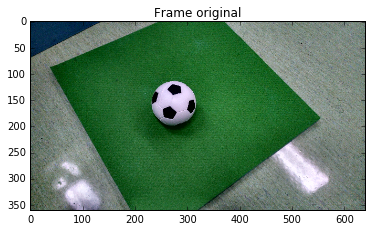

In [4]:
# cap = cv2.VideoCapture(0) #Abrindo camera

# os.system("v4l2-ctl -d /dev/video0 -c focus_auto=0 && v4l2-ctl -d /dev/video0 -c focus_absolute=0") # Desligando auto-foco

# for i in xrange(0,50): # Pegando 30 frames
#     ret, frame = cap.read()
    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cv2.destroyAllWindows()
# cap.release()

frame = cv2.imread('bolaMeio.jpg')

# Exibindo frame
frame = cv2.resize(frame, (0,0), fx=640.0/frame.shape[1], fy=640.0/frame.shape[1])
plt.imshow(frame)
plt.title(u"Frame original")
plt.show()

### Funções de segmentação

In [5]:
def segColor(frame, seg):
    media = cv2.medianBlur(frame, seg['blur'][0]) # Media blur tentar homogeneizar as cores
    hsv = cv2.cvtColor(media, cv2.COLOR_BGR2HSV) # Convertendo de RGB para HSV
    
    mask_campo = cv2.inRange(hsv, # imagem a ser aplicada
        np.array([seg['H_min'][0], seg['S_min'][0], seg['V_min'][0]]), # Valores mínimos do HSV
        np.array([seg['H_max'][0], seg['S_max'][0], seg['V_max'][0]]), # Valores máximos do HSV
        ) # Segmentando a cor

    ## erosion
    mask_campo = cv2.erode(mask_campo, # Aonde sera aplicada
                           np.ones((seg['size_element'][0],seg['size_element'][0]),np.uint8), # Tamanho do ES
                           iterations = seg['iterations'][0] # Número de iterações
                          )

    ## dilation
    mask_campo = cv2.dilate(mask_campo, # Aonde sera aplicada
                           np.ones((seg['size_element'][0],seg['size_element'][0]),np.uint8), # Tamanho do ES
                           iterations = seg['iterations'][0] # Número de iterações
                          )
    return mask_campo

def segGreen(frame): # Segmentação verde
    return segColor(frame, seg_green)

def segWhite(frame): # Segmentação branco
    return segColor(frame, seg_white)

### Aplicando segmentação do verde

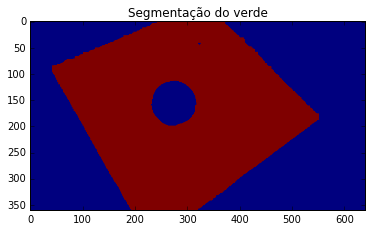

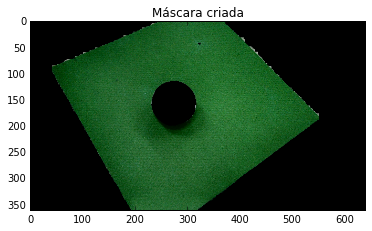

In [6]:
seg_green['blur'][0] = 5 # Deve ser ímpar ou zero

seg_green['H_min'][0] = 50
seg_green['H_max'][0] = 72

seg_green['S_min'][0] = 19
seg_green['S_max'][0] = 255

seg_green['V_min'][0] = 0
seg_green['V_max'][0] = 195

seg_green['size_element'][0] = 3
seg_green['iterations'][0] = 5

mask_verde = segGreen(frame)

# Exibindo mascara do campo
plt.imshow(mask_verde)
plt.title(u"Segmentação do verde")
plt.show()

# Exibindo na imagem
plt.imshow(cv2.bitwise_and(frame,frame,mask=mask_verde))
plt.title(u"Máscara criada")
plt.show()

### Função de para a recontrução interna da máscara

In [7]:
## Recebe uma masca.
# @param mask_campo - Recebe a máscara com algumas imperfeições como furos ou chanfros internos.
# @retun - Devolve uma máscara sem os furos e chanfros internos.
def internalReconstruction(mask_campo): # Retira os buracos internos da mascara
    contours, _ = cv2.findContours(mask_campo.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # Determina o contorno
    mask = np.zeros(mask_campo.shape, np.uint8) # Cria uma mascara
    
    ## Contorno perimetro
#     cnt = contours[0]
#     epsilon = 0.05*cv2.arcLength(cnt,True)
#     approx = cv2.approxPolyDP(cnt,epsilon,True)
#     cv2.drawContours(mask,[approx], -1, (255), -1)
    
    ## Contorno retangular
#     cnt = contours[0]
#     rect = cv2.minAreaRect(cnt)
#     box = cv.BoxPoints(rect)
#     box = np.int0(box)
#     cv2.drawContours(mask,[box], -1, (255), -1)

    ## Contorno simples - Borda completa
    cv2.drawContours(mask, contours, -1, (255), -1) # gerando máscara
    
    ## erosion
    mask_campo = cv2.erode(mask_campo, # Aonde sera aplicada
                           np.ones((internal_reconstruction['size_element'][0],internal_reconstruction['size_element'][0]),np.uint8), # Tamanho do ES
                           iterations = internal_reconstruction['iterations'][0] # Número de iterações
                          )

    ## dilation
    mask_campo = cv2.dilate(mask_campo, # Aonde sera aplicada
                           np.ones((internal_reconstruction['size_element'][0],internal_reconstruction['size_element'][0]),np.uint8), # Tamanho do ES
                           iterations = internal_reconstruction['iterations'][0] # Número de iterações
                          )
    return mask

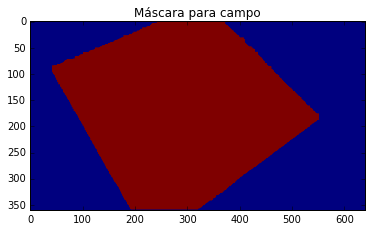

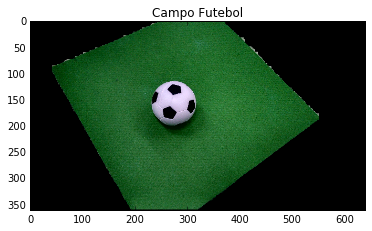

In [8]:
internal_reconstruction['size_element'][0] = 5
internal_reconstruction['iterations'][0] = 10

mask_campo = internalReconstruction(mask_verde)

plt.imshow(mask_campo)
plt.title(u"Máscara para campo")
plt.show()

## Para o frame
plt.imshow(cv2.bitwise_and(frame,frame,mask=mask_campo))
plt.title("Campo Futebol")
plt.show()

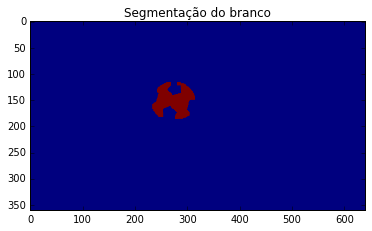

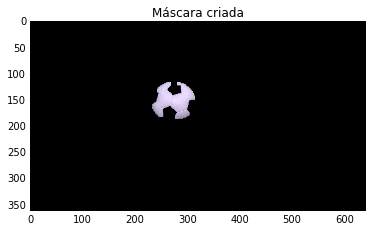

In [9]:
seg_white['blur'][0] = 0 # Deve ser ímpar ou zero

seg_white['H_min'][0] = 0
seg_white['H_max'][0] = 255

seg_white['S_min'][0] = 0
seg_white['S_max'][0] = 255

seg_white['V_min'][0] = 155
seg_white['V_max'][0] = 255

seg_white['size_element'][0] = 3
seg_white['iterations'][0] = 3

mask_branco = segWhite(cv2.bitwise_and(frame,frame,mask=mask_campo))

# Exibindo mascara do campo
plt.imshow(mask_branco)
plt.title(u"Segmentação do branco")
plt.show()

# Exibindo na imagem
plt.imshow(cv2.bitwise_and(frame,frame,mask=mask_branco))
plt.title(u"Máscara criada")
plt.show()

### Função de dilatação da máscara

In [10]:
def maskDilate(mask_branco):
    ## dilation
    mask_bola = cv2.dilate(mask_branco, # Aonde sera aplicada
                           np.ones((mask_dilate['size_element'][0],mask_dilate['size_element'][0]),np.uint8), # Tamanho do ES
                           iterations = mask_dilate['iterations'][0] # Número de iterações
                          )
    
    ## erosion
    mask_bola = cv2.erode(mask_bola, # Aonde sera aplicada
                           np.ones((mask_dilate['size_element'][0],mask_dilate['size_element'][0]),np.uint8), # Tamanho do ES
                           iterations = mask_dilate['iterations'][0] - mask_dilate['diff'][0] # Número de iterações
                          )

    mask_bola = cv2.blur(mask_bola, # Aonde sera aplicada
                         (mask_dilate['blur'][0],mask_dilate['blur'][0]) # Tamanho do ES
                        )
    return mask_bola

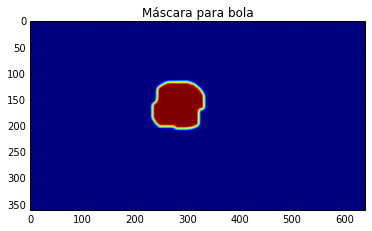

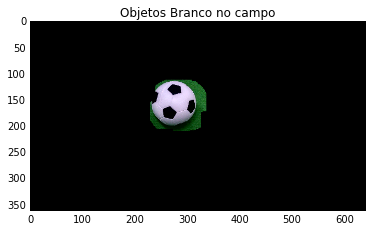

In [11]:
mask_dilate['size_element'][0] = 10
mask_dilate['iterations'][0] = 10

mask_dilate['diff'][0] = 2
mask_dilate['blur'][0] = 9

mask_bola = maskDilate(mask_branco)

plt.imshow(mask_bola)
plt.title(u"Máscara para bola")
plt.show()

## Para o frame
plt.imshow(cv2.bitwise_and(frame,frame,mask=mask_bola))
plt.title("Objetos Branco no campo")
plt.show()

### Detecção de circulo pelo método do circulo de Hough

In [12]:
def detectCircles(img):
    media = cv2.medianBlur(img,paramcirhough['blur'][0]) # Media blur para suavisar transições
    cimg = cv2.cvtColor(media,cv.CV_BGR2GRAY) # Imagem em tons de cinza

    circles = cv2.HoughCircles(cimg, # Imagem a ser aplicada
                               cv.CV_HOUGH_GRADIENT, # Tecnica usada
                               paramcirhough['dp'][0], # 
                               paramcirhough['minDist'][0], # Distancia minima entre centros
                               param1 = paramcirhough['param1'][0],
                               param2 = paramcirhough['param2'][0],
                               minRadius = paramcirhough['minRadius'][0], # Raio minimo
                               maxRadius = paramcirhough['maxRadius'][0]) # Raio maximo
    return circles

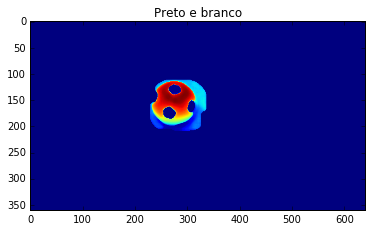

Achou algo


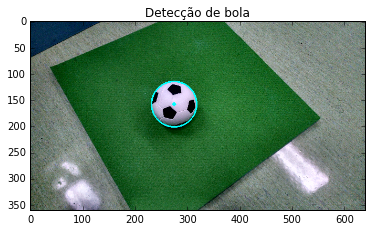

In [13]:
paramcirhough['blur'][0] = 9

paramcirhough['dp'][0] = 2.5
paramcirhough['minDist'][0] = 100
paramcirhough['param1'][0] = 200
paramcirhough['param2'][0] = 70
paramcirhough['minRadius'][0] = 0
paramcirhough['maxRadius'][0] =  0


frame1 = frame.copy()
img = cv2.bitwise_and(frame,frame,mask=mask_bola) # Gerando mascara para a bola

plt.imshow(cv2.cvtColor(cv2.medianBlur(img,paramcirhough['blur'][0]),cv.CV_BGR2GRAY))
plt.title("Preto e branco")
plt.show()

circles = detectCircles(img)

if circles is not None:
    print "Achou algo"
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(frame1,(i[0],i[1]),i[2],(0,255,0),2)
        # draw the center of the circle
        cv2.circle(frame1,(i[0],i[1]),2,(255,0,0),3)
    cv2.circle(frame1,(circles[0,0][0],circles[0,0][1]),circles[0,0][2],(0,255,255),2)
    # draw the center of the circle
    cv2.circle(frame1,(circles[0,0][0],circles[0,0][1]),2,(0,255,255),3)

plt.imshow(frame1)
plt.title(u"Detecção de bola")
plt.show()

### Lendo Config.ini

In [14]:
def readDic(dictionary, Config):
    listnames = dictionary.keys()
    listnames.remove('comment')
    listnames.remove('section')
    listnames.sort(reverse=True)
    while True:
            if dictionary['section'] in Config.sections():
                print 'Leitura do config.ini, '+ dictionary['section']
                for i in listnames:
                    if dictionary[i][1] == 'int':
                        dictionary[i][0] = Config.getint(dictionary['section'], i)
                    elif dictionary[i][1] == 'float':
                        dictionary[i][0] = Config.getfloat(dictionary['section'], i)
                    else:
                        dictionary[i][0] = Config.get(dictionary['section'], i)
                break

            else:
                print 'Falha na leitura do config.ini, crinando arquivo\n'+ dictionary['section'] +' inexistente, criando valores padrão'
#                 Config.write('./Data/config.ini')
                Config.add_section(dictionary['section'])
                for i in listnames:
                    Config.set(dictionary['section'], i, str(dictionary[i][0]) + ' ;' + dictionary[i][4])

                with open('./Data/config.ini', 'wr') as configfile:
                    Config.write(configfile)
                Config.read('./Data/config.ini')

In [15]:
Config = ConfigParser()
Config.read('./Data/config.ini')
readDic(seg_white, Config)
# print '\n'
readDic(seg_green, Config)
# print '\n'
readDic(internal_reconstruction, Config)
# print '\n'
readDic(mask_dilate, Config)
# print '\n'
readDic(paramcirhough, Config)

Leitura do config.ini, Seg. Branco
Leitura do config.ini, Seg. Verde
Leitura do config.ini, Reconstrução interna
Leitura do config.ini, Dilatação Máscara
Leitura do config.ini, Circulo de Hough


### Finalizando config.ini

In [ ]:
def whiteDic(dictionary, Config):
    listnames = dictionary.keys()
    listnames.remove('comment')
    listnames.remove('section')
    listnames.sort(reverse=True)
    for i in listnames:
        Config.set(dictionary['section'], i, str(dictionary[i][0]) + ' ;' + dictionary[i][4])

    with open('./Data/config.ini', 'wr') as configfile:
        Config.write(configfile)

In [ ]:
whiteDic(seg_white, Config)
# print '\n'
whiteDic(seg_green, Config)
# print '\n'
whiteDic(internal_reconstruction, Config)
# print '\n'
whiteDic(mask_dilate, Config)
# print '\n'
whiteDic(paramcirhough, Config)

In [ ]:
## Dicionário para controle de lógica
controlprocess = {
    'nlostframe': [3, # Valor usado
                'int', # Tipo do dado
                '', # Restrição do dado
                0, # Valor mínimo atingido
                10, # Valor máximo  atingido
                "Quantidades de frames necessarios considerar bola perdida" # Comentário do config.ini
             ],
    'scale': [10.0, # Valor usado
                'float', # Tipo do dado
                '', # Restrição do dado
                1, # Valor mínimo atingido
                1000, # Valor máximo  atingido
                "Quantidades de frames necessarios considerar bola perdida" # Comentário do config.ini
             ],
    'media': [5, # Valor usado
                'int', # Tipo do dado
                '', # Restrição do dado
                0, # Valor mínimo atingido
                1000, # Valor máximo  atingido
                "Qauntidade de valores para calculo da média" # Comentário do config.ini
             ]
}

## Variaveis dinamica de controle
inspos = []
presentstatus = np.array([0,-1,-1,-1])
contframelost = 0

## Responsável por fazer a detecção da bola diteramante com o frame da câmera sem um pré-tratamento expecifico e retorna o status da bola na imagem atravez de um vetor, a descrição do vetor segue na tabela a seguir:

| Posição do Vetor | Bola detectada | Campo detectado | Nada foi encontrado |
|:----------------:|:------------------------------------------------------------------------:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|:-----------------------------------------------------------:|
| 0 | Quando a bola é detectada, nesta posição é possível se lê 2 | Quando a campo é detectada, nesta posição é possível se lê 1 | Quando a nada é detectada, nesta posição é possível se lê 0 |
| 1 | Posição da bola na imagem no eixo X, considerando uma escala de -10 a 10 | Se dividirmos o frame em tres partes iguais no eixo X quando o campo se encontrar a sua maior parte a esquerda da imagem o valor é -1, caso esteja no centro o valor é 0 (zero), e caso esteja a direita retorna 1. | Nesta situação sempre sera colocado -1 nesta posição. |
| 2 | Posição da bola na imagem no eixo Y, considerando uma escala de -10 a 10 | Se dividirmos o frame em tres partes iguais no eixo Y quando o campo se encontrar a sua maior parte em cima da imagem o valor é -1, caso esteja no centro o valor é 0 (zero), e caso esteja em baixo retorna 1. | Nesta situação sempre sera colocado -1 nesta posição. |
| 3 | Valor do diametro da bola na imagem considerando a escala de -10 a 10 | Nesta situação sempre sera colocado -1 nesta posição. | Nesta situação sempre sera colocado -1 nesta posição. |

# @param frame: Frame que sera usado no processamento para a detecção da bola, porém o frame não vai sofrer nenhuma alteração a menos que o algum argumento de exibição de tela seja ativado, neste caso ao se foi detectado a bola sera desenhado um circulo e quadrado de corte sera criado representando aonde o corte do frame é realizado.
# @param res: Vetor que mostra a resolução da imagem.
# @return: Status da detecção da bola.

In [ ]:
def updateStatus(status):
    global contframelost
    global presentstatus
    global inspos
    global controlprocess
    if status[0] != 2 and presentstatus[0] == 2: # Testa se perdeu a bola por pouco tempo
        if contframelost < controlprocess['nlostframe'][0]:
            presentstatus = np.array([2,0,0,presentstatus[3]]) # Ainda está procurando a bola
        else:
            presentstatus = status # Bola perdida
        contframelost += 1

    elif status[0] == 2:
        if contframelost != 0:
            contframelost = 0
            inspos = np.array([[status[1], status[2], status[3]]])
            median = np.array([status[1], status[2], status[3]])
            presentstatus = np.array([2, median[0], median[1], median[2]])
        else:
            if len(inspos) >= controlprocess['media'][0]:
                inspos = np.delete(inspos, 0, 0)
            inspos = np.concatenate((inspos, np.array([[status[1], status[2], status[3]]])), axis=0)
            median = inspos.sum(axis = 0)/len(inspos)
            presentstatus = np.array([2, median[0], median[1], median[2]])
    else:
        presentstatus = status # Bola perdida
        contframelost += 1
    return presentstatus

In [ ]:
def detect(frame):
    if status[0] != 2 or contframelost >= controlprocess['nlostframe'][0] or True: # Bola perdida
        # Para a bola perdida
        fieldmask = segGreen(frame)
        fieldmask = internalReconstruction(fieldmask)

        # Teste se campo foi localizado
        fieldmoment = cv2.moments(fieldmask)
        if fieldmoment['m00'] == 0: # Campo não encontrado
            return updateStatus(np.array([0,-1,-1,-1]))

        # Criando máscara para a bola
        ballmask = segWhite(cv2.bitwise_and(frame,frame,mask=fieldmask))
        ballmask = maskDilate(ballmask)

        # Teste se bola foi localizado
        ballmoment = cv2.moments(ballmask)
        if ballmoment['m00'] == 0: # bola não encontrado
            cx = float(fieldmoment['m10']/(fieldmoment['m00']*frame.shape[0]))
            cy = float(fieldmoment['m01']/(fieldmoment['m00']*frame.shape[1]))
            if cx <= 0.3333:
                    cx = -1
            elif cx > 0.3333 and cx < 0.6667:
                cx = 0
            else:
                cx = 1

            if cy <= 0.3333:
                cy = -1
            elif cy > 0.3333 and cy < 0.6667:
                cy = 0
            else:
                cy = 1
            return updateStatus(np.array([1,cx,cy,-1]))

        circles = detectCircles(cv2.bitwise_and(frame,frame,mask=ballmask))

        if circles is not None:
            circles = np.uint16(np.around(circles))
            updateStatus(np.array([2, # Bola detectada
                                                     circles[0,0][0]*((2*controlprocess['scale'][0])/frame.shape[0])-controlprocess['scale'][0],
                                                     circles[0,0][1]*((2*controlprocess['scale'][0])/frame.shape[1])-controlprocess['scale'][0],
                                                     circles[0,0][2]*((2*controlprocess['scale'][0])/frame.shape[1])-controlprocess['scale'][0]
                                                    ])
                                          )
            cv2.circle(frame,
                       (int(((presentstatus[1]+controlprocess['scale'][0])/(2*controlprocess['scale'][0]))*frame.shape[0]), int(((presentstatus[2]+controlprocess['scale'][0])/(2*controlprocess['scale'][0]))*frame.shape[1])),
                       int(((presentstatus[3]+controlprocess['scale'][0])/(2*controlprocess['scale'][0]))*frame.shape[1]),
                       (0,255,255),
                       2
                      )
            # draw the center of the circle
            cv2.circle(frame,(circles[0,0][0],circles[0,0][1]),2,(0,255,255),3)
            return presentstatus
        else:
            cx = float(fieldmoment['m10']/(fieldmoment['m00']*frame.shape[0]))
            cy = float(fieldmoment['m01']/(fieldmoment['m00']*frame.shape[1]))
            if cx <= 0.3333:
                    cx = -1
            elif cx > 0.3333 and cx < 0.6667:
                cx = 0
            else:
                cx = 1

            if cy <= 0.3333:
                cy = -1
            elif cy > 0.3333 and cy < 0.6667:
                cy = 0
            else:
                cy = 1
            return updateStatus(np.array([1,cx,cy,-1]))

In [ ]:
# No inicio do sistema
presentstatus = np.array([0, -1, -1, -1])
contframelost = -1

cap = cv2.VideoCapture(0) #Abrindo camera

os.system("v4l2-ctl -d /dev/video0 -c focus_auto=0 && v4l2-ctl -d /dev/video0 -c focus_absolute=0") # Desligando auto-foco

for i in xrange(0,50): # Pegando 30 frames
    ret, frame = cap.read()
    
    clear_output()
    print detect(frame)
    frame = 
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()


    plt.imshow(frame)
    plt.title(u"Teste")
    plt.show()

In [ ]:
ballmoment['m00']

In [ ]:
contframelost